# Deliverable #2 - Interim Work in Jupyter Notebook
The interim deliverable allows the instructor to review your preliminary work and provide feedback.

You will perform the loading, examination, and processing of the data using Pandas.

You will perform descriptive analytics. Display number of observations (rows), variables (columns), summary statistics.

You may produce some simple plots. This will help you get a feel of your data and inform your next step of analysis.

You should submit a Jupyter Notebook with well-formatted documentation (in MArkdown cells) and Python comments (in code cells), Python code, and output (plots, charts).

The project proposal will no longer be needed. All of part of its content should be incorporated in the Jupyter notebook.


## 1. Load the data

In [1]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# shareable link
link = 'https://drive.google.com/file/d/18hafY1YLpmQFoi2H-jahWnmdq3-8k-sz/view?usp=sharing'

id = link.split('/')[5]
print(id)

18hafY1YLpmQFoi2H-jahWnmdq3-8k-sz


In [3]:
downloaded = drive.CreateFile({'id':'18hafY1YLpmQFoi2H-jahWnmdq3-8k-sz'}) 
downloaded.GetContentFile('crime.csv')  

In [4]:
# import libraries
import pandas as pd

df = pd.read_csv('crime.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2.018870e+09,2.018870e+15,2399,0,theft-other,larceny,12/27/2018 15:58,NaN,12/27/2018 16:51,2681 N HANOVER CT,3178210.0,1700715.0,-104.866156,39.755561,5,512,stapleton,1,0
1,2.015664e+09,2.015660e+15,5441,0,traffic-accident,traffic-accident,11/13/2015 7:45,NaN,11/13/2015 8:38,4100 BLOCK W COLFAX AVE,3129148.0,1694748.0,-105.040760,39.739991,1,122,west-colfax,0,1
2,2.017601e+10,2.017600e+16,2399,1,theft-bicycle,larceny,6/8/2017 13:15,6/8/2017 17:15,6/12/2017 8:44,1705 17TH ST,3140790.0,1699792.0,-104.999264,39.753669,6,612,union-station,1,0
3,2.019601e+10,2.019600e+16,2308,0,theft-from-bldg,larceny,12/7/2019 13:07,12/7/2019 18:30,12/9/2019 13:35,1350 N IRVING ST,3132400.0,1694088.0,-105.029208,39.738134,1,122,west-colfax,1,0
4,2.018862e+09,2.018860e+15,5016,0,violation-of-restraining-order,all-other-crimes,12/22/2018 20:15,12/22/2018 20:31,12/22/2018 22:00,13625 E RANDOLPH PL,3188580.0,1716158.0,-104.828868,39.797750,5,521,montbello,1,0


## 2. Examine/View the Data

In [6]:
# display the number of rows and columns
df.shape

(520220, 19)

There are 520,220 rows and 19 columns.

In [7]:
# look at a summary of the data
df.describe()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,IS_CRIME,IS_TRAFFIC
count,5.202200e+05,5.202200e+05,520220.000000,520220.000000,5.157260e+05,5.157260e+05,5.157260e+05,515726.000000,520220.000000,520220.000000,520220.000000,520220.000000
mean,4.052281e+09,4.052280e+15,3758.323465,0.205357,3.165117e+06,1.695630e+06,-1.049234e+02,39.718120,3.519067,369.451140,0.749316,0.251253
std,1.343402e+10,1.343402e+16,1652.792137,0.577347,7.202630e+05,1.771971e+05,2.015576e+00,0.763291,1.780415,178.824939,0.433407,0.433734
min,2.019600e+04,2.019652e+10,902.000000,0.000000,1.000000e+00,1.000000e+00,-1.154641e+02,0.000000,1.000000,111.000000,0.000000,0.000000
25%,2.016129e+09,2.016130e+15,2305.000000,0.000000,3.138718e+06,1.683216e+06,-1.050066e+02,39.707929,2.000000,221.000000,0.000000,0.000000
50%,2.017737e+09,2.017740e+15,3532.000000,0.000000,3.145625e+06,1.694794e+06,-1.049821e+02,39.739812,3.000000,323.000000,1.000000,0.000000
75%,2.019558e+09,2.019560e+15,5441.000000,0.000000,3.162438e+06,1.701859e+06,-1.049223e+02,39.759203,5.000000,521.000000,1.000000,1.000000
max,2.020890e+12,2.020890e+18,7399.000000,5.000000,4.067477e+07,1.141836e+07,5.000000e-07,39.904311,7.000000,759.000000,1.000000,1.000000


In [8]:
# get info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520220 entries, 0 to 520219
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   INCIDENT_ID             520220 non-null  float64
 1   OFFENSE_ID              520220 non-null  float64
 2   OFFENSE_CODE            520220 non-null  int64  
 3   OFFENSE_CODE_EXTENSION  520220 non-null  int64  
 4   OFFENSE_TYPE_ID         520220 non-null  object 
 5   OFFENSE_CATEGORY_ID     520220 non-null  object 
 6   FIRST_OCCURRENCE_DATE   520220 non-null  object 
 7   LAST_OCCURRENCE_DATE    170318 non-null  object 
 8   REPORTED_DATE           520220 non-null  object 
 9   INCIDENT_ADDRESS        471864 non-null  object 
 10  GEO_X                   515726 non-null  float64
 11  GEO_Y                   515726 non-null  float64
 12  GEO_LON                 515726 non-null  float64
 13  GEO_LAT                 515726 non-null  float64
 14  DISTRICT_ID         

In [9]:
# what are the first 5 rows
df.head(5)

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2.018870e+09,2.018870e+15,2399,0,theft-other,larceny,12/27/2018 15:58,NaN,12/27/2018 16:51,2681 N HANOVER CT,3178210.0,1700715.0,-104.866156,39.755561,5,512,stapleton,1,0
1,2.015664e+09,2.015660e+15,5441,0,traffic-accident,traffic-accident,11/13/2015 7:45,NaN,11/13/2015 8:38,4100 BLOCK W COLFAX AVE,3129148.0,1694748.0,-105.040760,39.739991,1,122,west-colfax,0,1
2,2.017601e+10,2.017600e+16,2399,1,theft-bicycle,larceny,6/8/2017 13:15,6/8/2017 17:15,6/12/2017 8:44,1705 17TH ST,3140790.0,1699792.0,-104.999264,39.753669,6,612,union-station,1,0
3,2.019601e+10,2.019600e+16,2308,0,theft-from-bldg,larceny,12/7/2019 13:07,12/7/2019 18:30,12/9/2019 13:35,1350 N IRVING ST,3132400.0,1694088.0,-105.029208,39.738134,1,122,west-colfax,1,0
4,2.018862e+09,2.018860e+15,5016,0,violation-of-restraining-order,all-other-crimes,12/22/2018 20:15,12/22/2018 20:31,12/22/2018 22:00,13625 E RANDOLPH PL,3188580.0,1716158.0,-104.828868,39.797750,5,521,montbello,1,0


In [10]:
# what are the last 5 rows
df.tail(5)

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
520215,2.020586e+09,2.020590e+15,1313,0,assault-simple,other-crimes-against-persons,9/30/2020 10:00,NaN,9/30/2020 11:26,8801 E MLK BLVD,3172894.0,1702787.0,-104.885013,39.761350,5,512,central-park,1,0
520216,2.020550e+09,2.020550e+15,1315,1,aggravated-assault-dv,aggravated-assault,9/12/2020 7:34,NaN,9/12/2020 7:34,5375 W 10TH AVE,3125094.0,1692507.0,-105.055214,39.733895,1,122,villa-park,1,0
520217,2.020601e+10,2.020600e+16,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,9/12/2020 14:45,9/12/2020 14:45,9/12/2020 14:57,902 27TH ST,3145983.0,1700959.0,-104.980771,39.756793,2,211,five-points,1,0
520218,2.020582e+09,2.020580e+15,5707,0,criminal-trespassing,all-other-crimes,9/28/2020 17:59,NaN,9/28/2020 17:59,1201 5TH ST,3137809.0,1695270.0,-105.009952,39.741300,1,123,auraria,1,0
520219,2.020601e+10,2.020600e+16,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,9/26/2020 4:00,9/26/2020 5:00,9/26/2020 16:56,8200 BLK E 8TH AVE,3170620.0,1690662.0,-104.893389,39.728107,3,321,lowry-field,1,0


In [11]:
# 5 random rows
df.sample(5)

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
398004,2.020770e+08,2.020770e+14,2999,0,criminal-mischief-other,public-disorder,2/4/2020 2:00,2/4/2020 5:30,2/4/2020 8:49,3440 PARK AVEW,3142134.0,1703806.0,-104.994404,39.764668,1,112,globeville,1,0
37625,2.015600e+10,2.015600e+16,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,2/9/2015 11:55,2/9/2015 11:55,2/9/2015 12:23,4200 MORRISON RD,3128891.0,1681761.0,-105.041906,39.704343,4,412,westwood,1,0
433132,2.017640e+09,2.017640e+15,2204,0,burglary-residence-no-force,burglary,9/23/2017 1:30,9/23/2017 10:00,9/23/2017 13:06,3328 S DAYTON CT,3176186.0,1664553.0,-104.874240,39.656328,3,323,hampden,1,0
358510,2.018600e+10,2.018600e+16,2308,0,theft-from-bldg,larceny,5/5/2018 22:35,5/5/2018 23:15,5/6/2018 13:05,1539 S BROADWAY ST,3144119.0,1676130.0,-104.987898,39.688661,3,313,overland,1,0
154358,2.019818e+09,2.019820e+15,2404,0,theft-of-motor-vehicle,auto-theft,12/30/2019 5:40,NaN,12/30/2019 6:24,1800 BLK S WOLFF ST,3127139.0,1673778.0,-105.048274,39.682452,4,421,mar-lee,1,0


## 3. Process the Data

### 3.1 Pull out Day, Month, Year, and Time

Going to use the **FIRST_OCCURENCE_DATE** as my date and time for the crimes.

In [12]:
df['year'] = pd.DatetimeIndex(df['FIRST_OCCURRENCE_DATE']).year
df['month'] = pd.DatetimeIndex(df['FIRST_OCCURRENCE_DATE']).month
df['day'] = pd.DatetimeIndex(df['FIRST_OCCURRENCE_DATE']).day
df['time'] = pd.DatetimeIndex(df['FIRST_OCCURRENCE_DATE']).time

In [13]:
# Monday = 0, Sunday = 6
df['day_of_week'] = pd.DatetimeIndex(df['FIRST_OCCURRENCE_DATE']).dayofweek

In [14]:
df['date'] = pd.DatetimeIndex(df['FIRST_OCCURRENCE_DATE']).date

In [15]:
df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,year,month,day,time,day_of_week,date
0,2.018870e+09,2.018870e+15,2399,0,theft-other,larceny,12/27/2018 15:58,NaN,12/27/2018 16:51,2681 N HANOVER CT,3178210.0,1700715.0,-104.866156,39.755561,5,512,stapleton,1,0,2018,12,27,15:58:00,3,2018-12-27
1,2.015664e+09,2.015660e+15,5441,0,traffic-accident,traffic-accident,11/13/2015 7:45,NaN,11/13/2015 8:38,4100 BLOCK W COLFAX AVE,3129148.0,1694748.0,-105.040760,39.739991,1,122,west-colfax,0,1,2015,11,13,07:45:00,4,2015-11-13
2,2.017601e+10,2.017600e+16,2399,1,theft-bicycle,larceny,6/8/2017 13:15,6/8/2017 17:15,6/12/2017 8:44,1705 17TH ST,3140790.0,1699792.0,-104.999264,39.753669,6,612,union-station,1,0,2017,6,8,13:15:00,3,2017-06-08
3,2.019601e+10,2.019600e+16,2308,0,theft-from-bldg,larceny,12/7/2019 13:07,12/7/2019 18:30,12/9/2019 13:35,1350 N IRVING ST,3132400.0,1694088.0,-105.029208,39.738134,1,122,west-colfax,1,0,2019,12,7,13:07:00,5,2019-12-07
4,2.018862e+09,2.018860e+15,5016,0,violation-of-restraining-order,all-other-crimes,12/22/2018 20:15,12/22/2018 20:31,12/22/2018 22:00,13625 E RANDOLPH PL,3188580.0,1716158.0,-104.828868,39.797750,5,521,montbello,1,0,2018,12,22,20:15:00,5,2018-12-22


## 4. Graph Initial Plots

How many crimes have been reported every year?

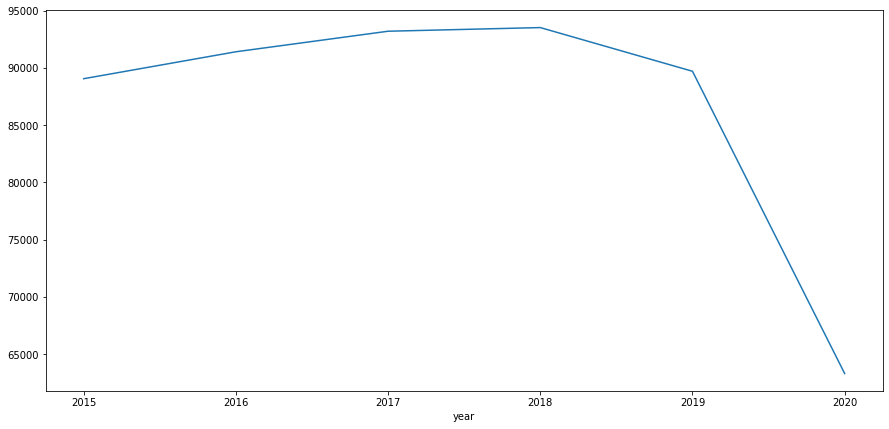

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# group by year
fig, ax = plt.subplots(figsize=(15,7))
df.groupby([df.year]).count()['INCIDENT_ID'].plot(ax=ax)

How many crimes are reported for every day?

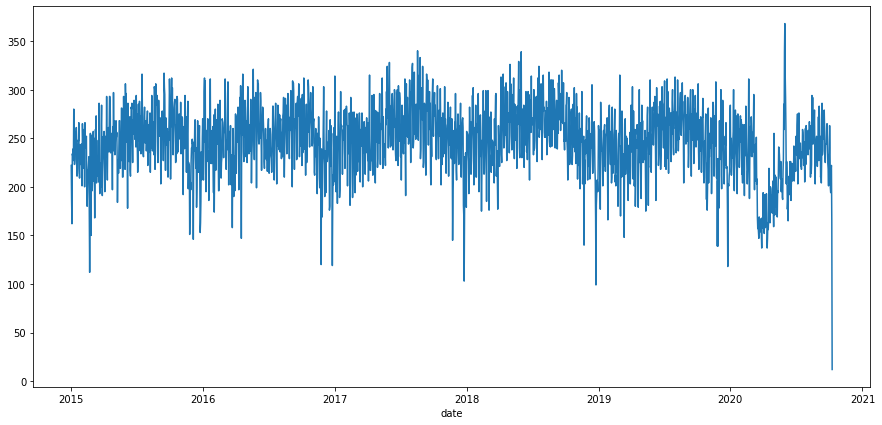

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby([df.date]).count()['INCIDENT_ID'].plot(ax=ax)

How many crimes are reported on each day of the week?

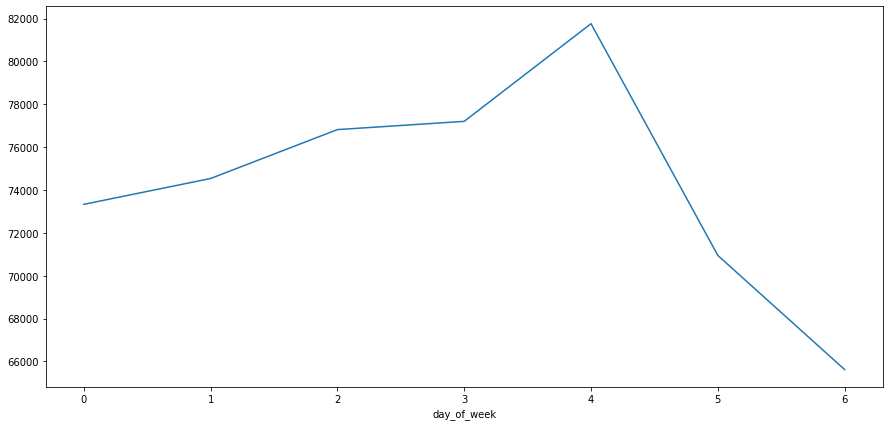

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby([df.day_of_week]).count()['INCIDENT_ID'].plot(ax=ax)

Look at the how many crimes are in each of the districts.

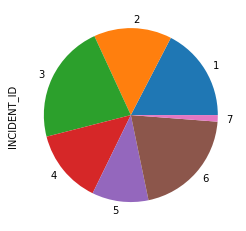

In [19]:
df.groupby(df['DISTRICT_ID']).count()['INCIDENT_ID'].plot.pie()